[![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.jupyter.org/github/claresinger/PySDM-examples/blob/clare_ARG/PySDM_examples/Abdul_Razzak_Ghan_2000/figs1-5.ipynb)
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/claresinger/PySDM-examples.git/clare_ARG?urlpath=PySDM_examples/Abdul_Razzak_Ghan_2000/figs1-5.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/claresinger/PySDM-examples/blob/clare_ARG/PySDM_examples/Abdul_Razzak_Ghan_2000/figs1-5.ipynb)

#### based on Figs. 1-5 from Abdul-Razzak and Ghan 2000 (JGR: Atmos.)  "_A parameterization of aerosol activation: 2. Multiple aerosol types_"
http://doi.wiley.com/10.1029/1999JD901161

In [1]:
import numpy as np
from matplotlib import pyplot
from atmos_cloud_sim_uj_utils import show_plot

from PySDM_examples.Abdul_Razzak_Ghan_2000.run_ARG_parcel import run_parcel

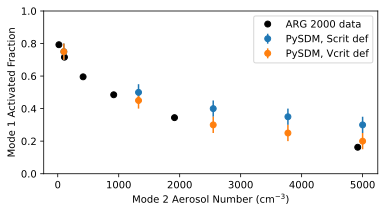

HTML(value="<a href='./fig_1.pdf' target='_blank'>./fig_1.pdf</a><br>")

In [2]:
N2 = np.linspace(100,5000,5)
AF_S = np.zeros((2,len(N2)))
AF_V = np.zeros((2,len(N2)))
AFerror = np.zeros(len(N2))

w = 0.5 # 0.5 m/s
sol2 = 1.0 # 100% ammonium sulfate
rad2 = 50.0 # 50nm
n_sd_per_mode = 20

for i,N2i in enumerate(N2):
    output, output_attributes, aerosol, act_S, act_V, error = run_parcel(w, sol2, N2i, rad2, n_sd_per_mode)
    AF_S[:,i] = act_S
    AF_V[:,i] = act_V
    AFerror[i] = error[0]
    
N2_obs = [19, 110, 416, 918, 1915, 4920]
ActFrac_obs = [0.7927, 0.7161, 0.5954, 0.48506, 0.34446, 0.1626]

fig, ax = pyplot.subplots(1, 1, sharex=True, figsize=(6,3))
ax.plot(N2_obs, ActFrac_obs, "ko", label="ARG 2000 data")

ax.errorbar(N2, AF_S[0,:], yerr=AFerror, fmt='o', label="PySDM, Scrit def")
ax.errorbar(N2, AF_V[0,:], yerr=AFerror, fmt='o', label="PySDM, Vcrit def")
ax.set_ylabel(f'Mode 1 Activated Fraction')
ax.set_ylim([0,1])

pyplot.xlabel('Mode 2 Aerosol Number (cm$^{-3}$)')
pyplot.legend(loc="best")
show_plot("fig_1.pdf")

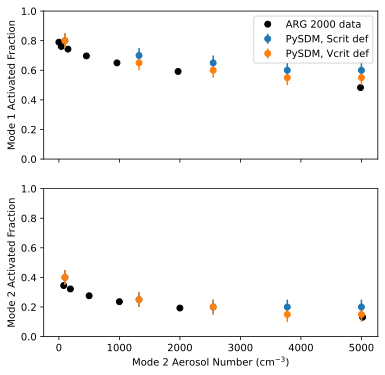

HTML(value="<a href='./fig_2.pdf' target='_blank'>./fig_2.pdf</a><br>")

In [3]:
N2 = np.linspace(100,5000,5)
AF_S = np.zeros((2,len(N2)))
AF_V = np.zeros((2,len(N2)))
AFerror = np.zeros(len(N2))

w = 0.5 # 0.5 m/s
sol2 = 0.1 # 10% ammonium sulfate, 90% insoluble
rad2 = 50.0 # 50nm
n_sd_per_mode = 20

for i,N2i in enumerate(N2):
    output, output_attributes, aerosol, act_S, act_V, error = run_parcel(w, sol2, N2i, rad2, n_sd_per_mode)
    AF_S[:,i] = act_S
    AF_V[:,i] = act_V
    AFerror[i] = error[0]
    
a_N2_obs = [0, 40, 150, 455, 960, 1970, 4985]
a_ActFrac_obs = [0.790, 0.761, 0.743, 0.697, 0.650, 0.592, 0.483]

b_N2_obs = [80, 190, 500, 1000, 2000, 5020]
b_ActFrac_obs = [0.345, 0.322, 0.276, 0.236, 0.193, 0.131]

fig, axes = pyplot.subplots(2, 1, sharex=True, figsize=(6,6))
axes[0].plot(a_N2_obs, a_ActFrac_obs, "ko", label="ARG 2000 data")
axes[1].plot(b_N2_obs, b_ActFrac_obs, "ko")

for i, ax in enumerate(axes):
    ax.errorbar(N2, AF_S[i,:], yerr=AFerror, fmt='o', label="PySDM, Scrit def")
    ax.errorbar(N2, AF_V[i,:], yerr=AFerror, fmt='o', label="PySDM, Vcrit def")
    ax.set_ylabel(f'Mode {i+1} Activated Fraction')
    ax.set_ylim([0,1])

pyplot.xlabel('Mode 2 Aerosol Number (cm$^{-3}$)')
axes[0].legend(loc="best")
show_plot("fig_2.pdf")

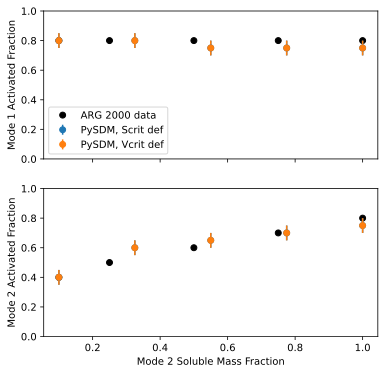

HTML(value="<a href='./fig_3.pdf' target='_blank'>./fig_3.pdf</a><br>")

In [4]:
sol2 = np.linspace(0.1,1,5) # X% ammonium sulfate, (1-X)% insoluble
AF_S = np.zeros((2,len(sol2)))
AF_V = np.zeros((2,len(sol2)))
AFerror = np.zeros(len(sol2))

w = 0.5 # 0.5 m/s
N2 = 100 # 100 1/cc
rad2 = 50.0 # 50nm
n_sd_per_mode = 20

for i,sol2i in enumerate(sol2):
    output, output_attributes, aerosol, act_S, act_V, error = run_parcel(w, sol2i, N2, rad2, n_sd_per_mode)
    AF_S[:,i] = act_S
    AF_V[:,i] = act_V
    AFerror[i] = error[0]
    
a_sol2_obs = [0.1, 0.25, 0.5, 0.75, 1]
a_ActFrac_obs = [0.8, 0.8, 0.8, 0.8, 0.8]

b_sol2_obs = [0.1, 0.25, 0.5, 0.75, 1]
b_ActFrac_obs = [0.4, 0.5, 0.6, 0.7, 0.8]

fig, axes = pyplot.subplots(2, 1, sharex=True, figsize=(6,6))
axes[0].plot(a_sol2_obs, a_ActFrac_obs, "ko", label="ARG 2000 data")
axes[1].plot(b_sol2_obs, b_ActFrac_obs, "ko")

for i, ax in enumerate(axes):
    ax.errorbar(sol2, AF_S[i,:], yerr=AFerror, fmt='o', label="PySDM, Scrit def")
    ax.errorbar(sol2, AF_V[i,:], yerr=AFerror, fmt='o', label="PySDM, Vcrit def")
    ax.set_ylabel(f'Mode {i+1} Activated Fraction')
    ax.set_ylim([0,1])

pyplot.xlabel('Mode 2 Soluble Mass Fraction')
axes[0].legend(loc="best")
show_plot("fig_3.pdf")

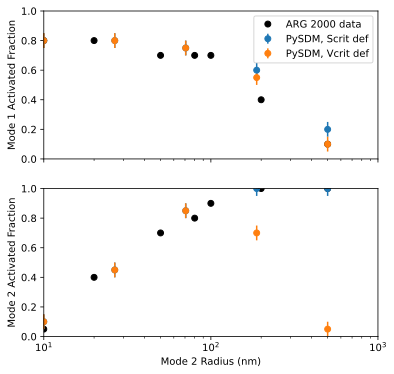

HTML(value="<a href='./fig_4.pdf' target='_blank'>./fig_4.pdf</a><br>")

In [24]:
rad2 = np.geomspace(10,500,5) # 10 - 500 nm mean radius
AF_S = np.zeros((2,len(rad2)))
AF_V = np.zeros((2,len(rad2)))
AFerror = np.zeros(len(rad2))

w = 0.5 # 0.5 m/s
N2 = 100 # 100 1/cc
sol2 = 1 # 100% ammonium sulfate
n_sd_per_mode = 20

for i,rad2i in enumerate(rad2):
    output, output_attributes, aerosol, act_S, act_V, error = run_parcel(w, sol2, N2, rad2i, n_sd_per_mode)
    AF_S[:,i] = act_S
    AF_V[:,i] = act_V
    AFerror[i] = error[0]
    
a_rad2_obs = [10, 20, 50, 80, 100, 200, 500]
a_ActFrac_obs = [0.8, 0.8, 0.7, 0.7, 0.7, 0.4, 0.1]

b_rad2_obs = [10, 20, 50, 80, 100, 200, 500]
b_ActFrac_obs = [0.05, 0.4, 0.7, 0.8, 0.9, 1.0, 1.0]

fig, axes = pyplot.subplots(2, 1, sharex=True, figsize=(6,6))
axes[0].plot(a_rad2_obs, a_ActFrac_obs, "ko", label="ARG 2000 data")
axes[1].plot(b_rad2_obs, b_ActFrac_obs, "ko")

for i, ax in enumerate(axes):
    ax.errorbar(rad2, AF_S[i,:], yerr=AFerror, fmt='o', label="PySDM, Scrit def")
    ax.errorbar(rad2, AF_V[i,:], yerr=AFerror, fmt='o', label="PySDM, Vcrit def")
    ax.set_ylabel(f'Mode {i+1} Activated Fraction')
    ax.set_ylim([0,1])
    ax.set_xscale('log')
    ax.set_xlim([10,1000])

pyplot.xlabel('Mode 2 Radius (nm)')
axes[0].legend(loc="best")
show_plot("fig_4.pdf")

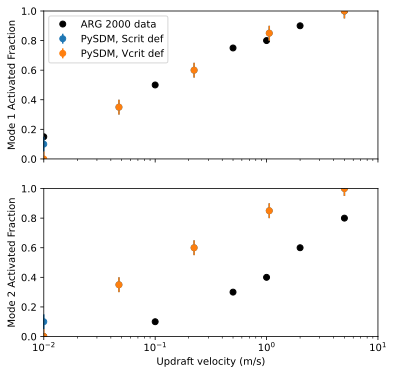

HTML(value="<a href='./fig_5.pdf' target='_blank'>./fig_5.pdf</a><br>")

In [6]:
w = np.geomspace(0.01, 5, 5) # updraft, m/s
AF_S = np.zeros((2,len(rad2)))
AF_V = np.zeros((2,len(rad2)))
AFerror = np.zeros(len(rad2))

N2 = 100 # 100 1/cc
rad2 = 50.0 # 50 nm
sol2 = 1 # 100% ammonium sulfate
n_sd_per_mode = 20

for i,wi in enumerate(w):
    output, output_attributes, aerosol, act_S, act_V, error = run_parcel(wi, sol2, N2, rad2, n_sd_per_mode)
    AF_S[:,i] = act_S
    AF_V[:,i] = act_V
    AFerror[i] = error[0]
    
a_w_obs = [0.01, 0.1, 0.5, 1, 2, 5]
a_ActFrac_obs = [0.15, 0.5, 0.75, 0.8, 0.9, 1.0]

b_w_obs = [0.01, 0.1, 0.5, 1, 2, 5]
b_ActFrac_obs = [0.0, 0.1, 0.3, 0.4, 0.6, 0.8]

fig, axes = pyplot.subplots(2, 1, sharex=True, figsize=(6,6))
axes[0].plot(a_w_obs, a_ActFrac_obs, "ko", label="ARG 2000 data")
axes[1].plot(b_w_obs, b_ActFrac_obs, "ko")

for i, ax in enumerate(axes):
    ax.errorbar(w, AF_S[i,:], yerr=AFerror, fmt='o', label="PySDM, Scrit def")
    ax.errorbar(w, AF_V[i,:], yerr=AFerror, fmt='o', label="PySDM, Vcrit def")
    ax.set_ylabel(f'Mode {i+1} Activated Fraction')
    ax.set_ylim([0,1])
    ax.set_xscale('log')
    ax.set_xlim([0.01, 10])

pyplot.xlabel('Updraft velocity (m/s)')
axes[0].legend(loc="best")
show_plot("fig_5.pdf")